# 시도 지역 코드 불러오기

In [29]:
import pandas as pd

In [30]:
# 난 안 났지만 오류가 난 사람들을 위해: vscode, jupyter에서는 여러 개 폴더를 한 번에 처리 못 함. 절대 경로로 넣고 수정할 것!

sido=pd.read_csv('data\시도지역코드.csv',encoding='euc_kr')
sido.head()

,시도지역코드,지역명
0,11,서울
1,26,부산
2,27,대구
3,28,인천
4,29,광주


In [31]:
sido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도지역코드  17 non-null     int64 
 1   지역명     17 non-null     object
dtypes: int64(1), object(1)
memory usage: 404.0+ bytes


In [32]:
# 시도지역코드 컬럼이 int64이므로 이런 계산 가능
sido['코드']=sido['시도지역코드']+10
sido.head()

,시도지역코드,지역명,코드
0,11,서울,21
1,26,부산,36
2,27,대구,37
3,28,인천,38
4,29,광주,39


In [33]:
sido=pd.read_csv('data\시도지역코드.csv',encoding='euc_kr')
sido.head()

,시도지역코드,지역명
0,11,서울
1,26,부산
2,27,대구
3,28,인천
4,29,광주


In [34]:
sido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도지역코드  17 non-null     int64 
 1   지역명     17 non-null     object
dtypes: int64(1), object(1)
memory usage: 404.0+ bytes


# 시도별 진료 정보 불러오기

In [35]:
# 현재 파일 정보 불러오기
import os

In [36]:
path='data/'
file_list=os.listdir(path)
file_list

['test.csv',
 'test2.csv',
 'train.csv',
 '구주 입국목적별 자료.xlsx',
 '국민건강보험공단_진료건수 정보_20240229',
 '국적별 관광 상용 자료.xlsx',
 '국적별 유학연수 기타 자료.csv',
 '시군구지역코드.csv',
 '시도지역코드.csv',
 '중간기말성적.csv',
 '진료정보_감기_시군구.csv',
 '진료정보_감기_시도.csv',
 '진료정보_눈병_시군구.csv',
 '진료정보_눈병_시도.csv',
 '진료정보_천식_시군구.csv',
 '진료정보_천식_시도.csv',
 '진료정보_피부염_시군구.csv',
 '진료정보_피부염_시도.csv',
 '출석프로젝트성적.csv',
 '한국전력공사_지역별 전기차 현황정보_20240731.csv']

In [37]:
if file_list[11].endswith('_시도.csv'):
    print(file_list[10])

진료정보_감기_시군구.csv


In [38]:
for i in file_list:
    if i.endswith("_시도.csv"):
        print(i)

진료정보_감기_시도.csv
진료정보_눈병_시도.csv
진료정보_천식_시도.csv
진료정보_피부염_시도.csv


In [39]:
df=pd.DataFrame() # 합 구할 때 for 문 전에 초기 값 부여한 것과 같은 맥락
for i in file_list:
    if i.endswith("_시도.csv"):
        data=pd.read_csv(path+i,encoding='euc_kr')
        df=pd.concat([df,data])
df.head()

,날짜,시도지역코드,발생건수(건)
0,2023-10-01,11.0,17218.0
1,2023-10-01,26.0,5699.0
2,2023-10-01,27.0,3590.0
3,2023-10-01,28.0,7524.0
4,2023-10-01,29.0,3044.0


In [40]:
df.shape

(141588, 3)

In [41]:
df=pd.DataFrame()
for i in file_list:
    if i.endswith("_시도.csv"):
        data=pd.read_csv(path+i,encoding='euc_kr')

        # split 메서드 사용해도 되지 않나?: if i.split("_")[1]=='감기': ...
        if '감기' in i:
            data['구분']='감기'
        elif '눈병' in i:
            data['구분']='눈병'
        elif '천식' in i:
            data['구분']='천식'
        else:
            data['구분']='피부염'

        df=pd.concat([df,data])
df.head()

,날짜,시도지역코드,발생건수(건),구분
0,2023-10-01,11.0,17218.0,감기
1,2023-10-01,26.0,5699.0,감기
2,2023-10-01,27.0,3590.0,감기
3,2023-10-01,28.0,7524.0,감기
4,2023-10-01,29.0,3044.0,감기


In [42]:
df=pd.DataFrame()
keywords=['감기','눈병','천식','피부염']
for i in file_list:
    if i.endswith("_시도.csv"):
        data=pd.read_csv(path+i,encoding='euc_kr')

        # split 메서드 사용해도 되지 않나?
        for key in keywords:
            if key in i:
                data['구분']=key
                break

        df=pd.concat([df,data])
df.head()

,날짜,시도지역코드,발생건수(건),구분
0,2023-10-01,11.0,17218.0,감기
1,2023-10-01,26.0,5699.0,감기
2,2023-10-01,27.0,3590.0,감기
3,2023-10-01,28.0,7524.0,감기
4,2023-10-01,29.0,3044.0,감기


In [43]:
df.shape

(141588, 4)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141588 entries, 0 to 35396
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   날짜       10264 non-null   object 
 1   시도지역코드   10264 non-null   float64
 2   발생건수(건)  10264 non-null   float64
 3   구분       141588 non-null  object 
dtypes: float64(2), object(2)
memory usage: 5.4+ MB


# 시도 지역 코드의 지역명 표시

In [45]:
df.columns

Index(['날짜', '시도지역코드', '발생건수(건)', '구분'], dtype='object')

In [46]:
sido.columns

Index(['시도지역코드', '지역명'], dtype='object')

In [47]:
data_merge=pd.merge(df,sido,how='left',on='시도지역코드')
data_merge.head()

,날짜,시도지역코드,발생건수(건),구분,지역명
0,2023-10-01,11.0,17218.0,감기,서울
1,2023-10-01,26.0,5699.0,감기,부산
2,2023-10-01,27.0,3590.0,감기,대구
3,2023-10-01,28.0,7524.0,감기,인천
4,2023-10-01,29.0,3044.0,감기,광주


In [48]:
data_merge['지역명'].unique() # nan 지워야!

array(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '경기', '강원', '충북', '충남',
       '전북', '전남', '경북', '경남', '제주', '전국', nan], dtype=object)

# 연별, 월별로 지역별 발생 건수 평균 구하기

In [49]:
data_merge.info() # 날짜는 문자열!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141588 entries, 0 to 141587
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   날짜       10264 non-null   object 
 1   시도지역코드   10264 non-null   float64
 2   발생건수(건)  10264 non-null   float64
 3   구분       141588 non-null  object 
 4   지역명      10264 non-null   object 
dtypes: float64(2), object(3)
memory usage: 5.4+ MB


In [50]:
# 먼저 연도와 월을 빼기

data_merge['연/월']=data_merge['날짜'].str[:7]
data_merge.head()

,날짜,시도지역코드,발생건수(건),구분,지역명,연/월
0,2023-10-01,11.0,17218.0,감기,서울,2023-10
1,2023-10-01,26.0,5699.0,감기,부산,2023-10
2,2023-10-01,27.0,3590.0,감기,대구,2023-10
3,2023-10-01,28.0,7524.0,감기,인천,2023-10
4,2023-10-01,29.0,3044.0,감기,광주,2023-10


In [51]:
# 데이터에서 전국을 제외하기

data_merge['지역명']!='전국'

0         True
1         True
2         True
3         True
4         True
          ... 
141583    True
141584    True
141585    True
141586    True
141587    True
Name: 지역명, Length: 141588, dtype: bool

In [52]:
dfdata=data_merge[data_merge['지역명']!='전국']
dfdata

,날짜,시도지역코드,발생건수(건),구분,지역명,연/월
0,2023-10-01,11.0,17218.0,감기,서울,2023-10
1,2023-10-01,26.0,5699.0,감기,부산,2023-10
2,2023-10-01,27.0,3590.0,감기,대구,2023-10
3,2023-10-01,28.0,7524.0,감기,인천,2023-10
4,2023-10-01,29.0,3044.0,감기,광주,2023-10
...,...,...,...,...,...,...
141583,NaN,NaN,NaN,피부염,NaN,NaN
141584,NaN,NaN,NaN,피부염,NaN,NaN
141585,NaN,NaN,NaN,피부염,NaN,NaN
141586,NaN,NaN,NaN,피부염,NaN,NaN


* 결측치 있는 행이나 열 삭제: 변수명.dropna(axis=0/1,how='any'/'all')
* how: any는 행이나 열에 하나라도 NaN이 있으면 삭제, all는 모두 NaN이 있어야 삭제

In [55]:
dfdata.isnull().sum()

날짜         131324
시도지역코드     131324
발생건수(건)    131324
구분              0
지역명        131324
연/월        131324
dtype: int64

In [56]:
dfdata.dropna(axis=0,how='all',inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_24460\1613275337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdata.dropna(axis=0,how='all',inplace=True)


In [57]:
dfdata.isnull().sum()

날짜         131324
시도지역코드     131324
발생건수(건)    131324
구분              0
지역명        131324
연/월        131324
dtype: int64

In [58]:
dfdata.dropna(axis=0,how='any',inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_24460\2155363050.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdata.dropna(axis=0,how='any',inplace=True)


In [59]:
dfdata.isnull().sum()

날짜         0
시도지역코드     0
발생건수(건)    0
구분         0
지역명        0
연/월        0
dtype: int64

In [60]:
dfdata

,날짜,시도지역코드,발생건수(건),구분,지역명,연/월
0,2023-10-01,11.0,17218.0,감기,서울,2023-10
1,2023-10-01,26.0,5699.0,감기,부산,2023-10
2,2023-10-01,27.0,3590.0,감기,대구,2023-10
3,2023-10-01,28.0,7524.0,감기,인천,2023-10
4,2023-10-01,29.0,3044.0,감기,광주,2023-10
...,...,...,...,...,...,...
108751,2024-02-29,45.0,2.0,피부염,전북,2024-02
108752,2024-02-29,46.0,2193.0,피부염,전남,2024-02
108753,2024-02-29,47.0,2619.0,피부염,경북,2024-02
108754,2024-02-29,48.0,3464.0,피부염,경남,2024-02


In [63]:
# 연/월, 구분별 발생 건수의 평균 구하기

dfdata.groupby(['연/월','구분'])[['발생건수(건)']].mean() # 연/월과 구분은 인덱스

발생건수(건)
연/월     구분               
2023-10 감기   29373.596349
        눈병    2077.245436
        천식    1099.300203
        피부염   2833.022312
2023-11 감기   35412.163866
        눈병    1959.560924
        천식    1288.512605
        피부염   2609.516807
2023-12 감기   37013.969512
        눈병    1872.800813
        천식    1318.876016
        피부염   2338.969512
2024-01 감기   29773.511156
        눈병    1790.464503
        천식    1149.563895
        피부염   2313.509128
2024-02 감기   24377.571739
        눈병    1721.552174
        천식     948.906522
        피부염   2265.293478

In [65]:
# 인덱스 없애려면?

yearmonthdf=dfdata.groupby(['연/월','구분'],as_index=False)[['발생건수(건)']].mean()
yearmonthdf

,연/월,구분,발생건수(건)
0,2023-10,감기,29373.596349
1,2023-10,눈병,2077.245436
2,2023-10,천식,1099.300203
3,2023-10,피부염,2833.022312
4,2023-11,감기,35412.163866
5,2023-11,눈병,1959.560924
6,2023-11,천식,1288.512605
7,2023-11,피부염,2609.516807
8,2023-12,감기,37013.969512
9,2023-12,눈병,1872.800813


In [66]:
dfdata['연/월'].unique()

array(['2023-10', '2023-11', '2023-12', '2024-01', '2024-02'],
      dtype=object)

# 5일 차

## 연/월, 구분별 발생 건수 평균 구하기

In [68]:
datedata=list(dfdata['연/월'].unique())
datedata

['2023-10', '2023-11', '2023-12', '2024-01', '2024-02']

조회 가능한 연도와 월: ['2023-10', '2023-11', '2023-12', '2024-01', '2024-02']
       연/월   구분       발생건수(건)
4  2023-11   감기  35412.163866
5  2023-11   눈병   1959.560924
6  2023-11   천식   1288.512605
7  2023-11  피부염   2609.516807


<Axes: title={'center': '2023-11 질병 현황'}, xlabel='구분'>

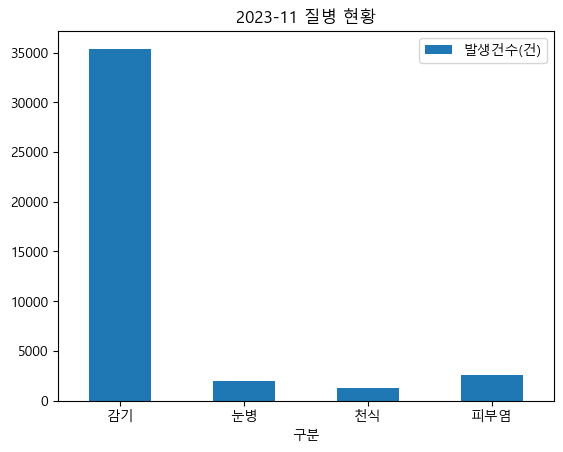

In [74]:
import matplotlib.pyplot as plt
plt.rc('font',family='malgun gothic')

print(f"조회 가능한 연도와 월: {datedata}")
yearmonthin=input("조회하고자 하는 연도와 월을 입력하세요(예: 2025-01) ")
yearmonthsearch=yearmonthdf[yearmonthdf['연/월']==yearmonthin]
print(yearmonthsearch)
yearmonthsearch.plot(kind='bar',x='구분',title=yearmonthin+' 질병 현황',rot=0)